<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import gzip
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from itertools import cycle
from tabulate import tabulate

In [3]:
data = pd.read_csv('compressed_data.csv.gz')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Soil_Type1                          581012 non-null 

In [5]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [6]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [10]:
y = data['Cover_Type']
X = data.drop('Cover_Type', axis=1)

In [11]:
Counter(y)

Counter({5: 9493, 2: 283301, 1: 211840, 7: 20510, 3: 35754, 6: 17367, 4: 2747})

In [12]:
undersample = RandomUnderSampler(sampling_strategy={1: 40000, 2: 40000})
X_under, y_under = undersample.fit_resample(X, y)

oversample = SMOTE(sampling_strategy={3: 40000, 4: 40000, 5: 40000, 6: 40000, 7: 40000})
X_resampled, y_resampled = oversample.fit_resample(X_under, y_under)

Counter(y_resampled)

Counter({1: 40000, 2: 40000, 3: 40000, 4: 40000, 5: 40000, 6: 40000, 7: 40000})

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [109]:
y_train = y_train - 1
y_test = y_test - 1

In [110]:
Counter(y_train)

Counter({3: 31994, 1: 31967, 5: 31978, 0: 32065, 4: 31955, 2: 32096, 6: 31945})

In [111]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# PyTorch

In [61]:
X_train.shape

(224000, 54)

In [77]:
class SimpleClassification(nn.Module):
  def __init__(self):
    super(SimpleClassification, self).__init__()
    self.layer1 = nn.Linear(X_train.shape[1], 256)
    self.layer2 = nn.Linear(256, 128)
    self.layer3 = nn.Linear(128, 64)
    self.out = nn.Linear(64, 7)
  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = F.relu(self.layer2(x))
    x = F.relu(self.layer3(x))
    x = self.out(x)
    return x

classy = SimpleClassification()

In [63]:
y_train

array([3, 3, 1, ..., 5, 6, 4])

In [64]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [65]:
optimizer = optim.Adam(classy.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [66]:
y_train.dtype

torch.int64

In [67]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(1, 100):
  classy.train()
  total_loss=0
  for x, target in train_loader:
    optimizer.zero_grad()
    output=classy(x)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  avg_loss = total_loss / len(train_loader)
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, Loss: {avg_loss:.4f}')

  if avg_loss < best_loss:
    best_loss = avg_loss
    best_model = classy.state_dict()
    counter = 0
  else:
    counter += 1
    if counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        classy.load_state_dict(best_model)
        break

Epoch: 10, Loss: 0.2440
Epoch: 20, Loss: 0.1799
Epoch: 30, Loss: 0.1496
Epoch: 40, Loss: 0.1313
Epoch: 50, Loss: 0.1193
Epoch: 60, Loss: 0.1090
Epoch: 70, Loss: 0.1007
Epoch: 80, Loss: 0.0953
Epoch: 90, Loss: 0.0904


In [68]:
classy.eval()

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=True)

y_pred_probs = []
y_actual = []

with torch.no_grad():
  for x, target in test_loader:
    output = classy(x)
    probabilities = F.softmax(output, dim=1).numpy()
    y_pred_probs.extend(probabilities)
    y_actual.extend(target.numpy())
    loss = criterion(output, target)
    total_loss += loss.item()


<Axes: >

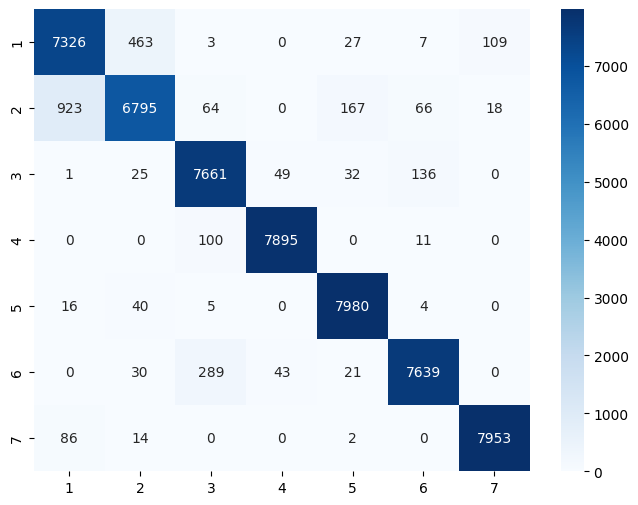

In [69]:
y_pred = np.argmax(y_pred_probs, axis=1) + 1
y_actual = np.array(y_actual) + 1

cm = confusion_matrix(y_actual, y_pred)

tensor_accuracy = accuracy_score(y_actual, y_pred)
tensor_precision = precision_score(y_actual, y_pred, average='weighted')
tensor_recall = recall_score(y_actual, y_pred, average='weighted')
tensor_f1 = f1_score(y_actual, y_pred, average='weighted')
tensor_roc = roc_auc_score(y_actual, y_pred_probs, multi_class='ovr')

# # Visualisasi dengan Seaborn
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")
# print(f"ROC AUC Score: {roc:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_actual), yticklabels=np.unique(y_actual))

In [70]:
y_actual = y_actual - 1

Unique labels in y_test: [0 1 2 3 4 5 6]


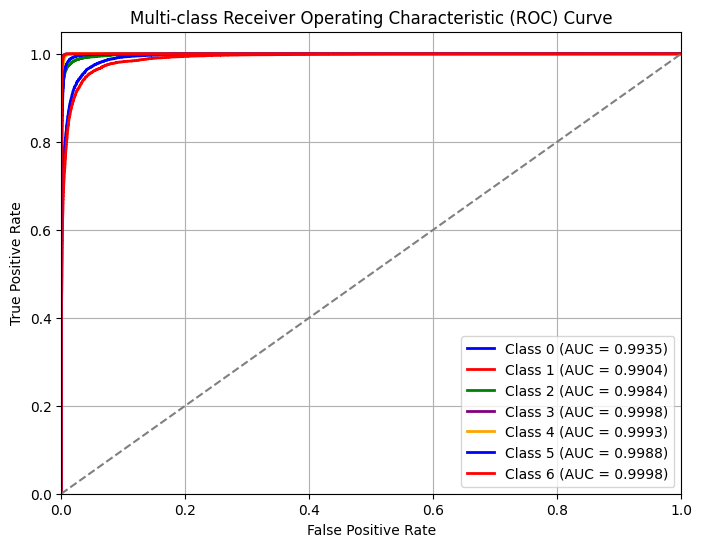

In [71]:
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

y_test_bin = label_binarize(y_actual, classes=np.arange(n_classes))

colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# TensorFlow

In [114]:
inputs = tf.keras.Input(shape=(X_train.shape[1], ))
hidden = tf.keras.layers.Dense(256, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(128, activation='relu')(hidden)
hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(7, activation='softmax')(hidden)

tf_model = tf.keras.Model(inputs, outputs)

eearly_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tf_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

tf_model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    batch_size=256,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.7745 - val_accuracy: 0.7965 - val_loss: 0.4965
Epoch 2/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8155 - loss: 0.4513 - val_accuracy: 0.8309 - val_loss: 0.4239
Epoch 3/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8448 - loss: 0.3854 - val_accuracy: 0.8628 - val_loss: 0.3517
Epoch 4/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8673 - loss: 0.3349 - val_accuracy: 0.8654 - val_loss: 0.3417
Epoch 5/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8801 - loss: 0.3059 - val_accuracy: 0.8852 - val_loss: 0.2976
Epoch 6/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8891 - loss: 0.2847 - val_accuracy: 0.8836 - val_loss: 0.2972
Epoch 7/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8947 - loss: 0.2661 - val_accuracy: 0.8980 - val_loss: 0.2684
Epoch 8/100
744/744 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9016 - loss: 0.2513 - val_accu

1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


<Axes: >

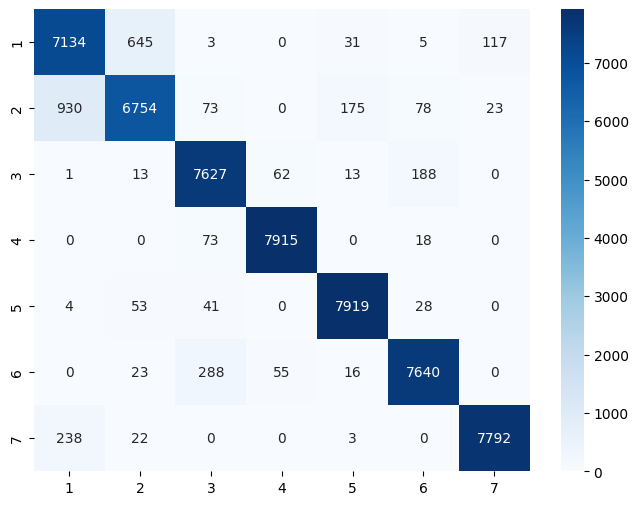

In [115]:
y_pred_probs = tf_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

y_pred = y_pred + 1
y_test = y_test + 1

cm = confusion_matrix(y_test, y_pred)

tf_acc = accuracy_score(y_test, y_pred)
tf_precision = precision_score(y_test, y_pred, average='weighted')
tf_recall = recall_score(y_test, y_pred, average='weighted')
tf_f1 = f1_score(y_test, y_pred, average='weighted')
tf_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
# Visualisasi dengan Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# print(f"\nAccuracy: {acc:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\nROC AUC Score: {roc_auc:.4f}")


In [116]:
y_test = y_test - 1


Unique labels in y_test: [0 1 2 3 4 5 6]


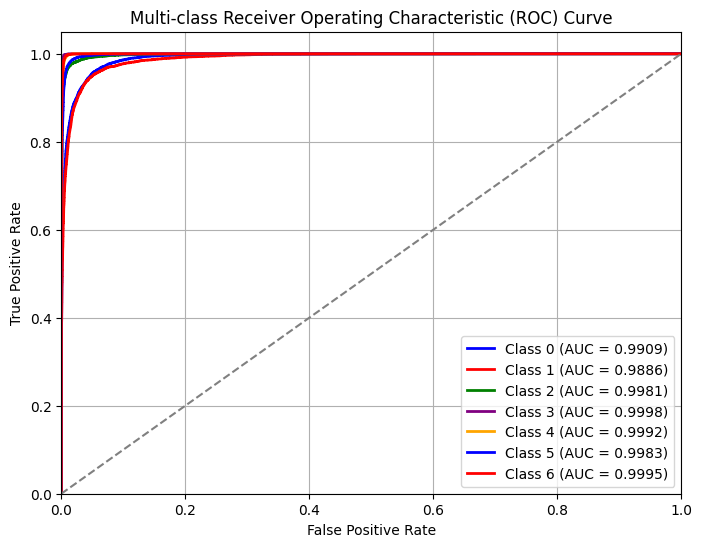

In [117]:
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])

plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Result

In [119]:
data = [
    ["Accuracy", tf_acc, tensor_accuracy],
    ["Precision", tf_precision, tensor_precision],
    ["Recall", tf_recall, tensor_recall],
    ["F1 Score", tf_f1, tensor_f1],
    ["AUC", tf_roc_auc, tensor_roc]
]

headers = ["Metric", "TensorFlow", "PyTorch"]
table = tabulate(data, headers=headers, tablefmt="grid")

print(table)

+-----------+--------------+-----------+
| Metric    |   TensorFlow |   PyTorch |
+===========+==============+===========+
| Accuracy  |     0.942518 |  0.950875 |
+-----------+--------------+-----------+
| Precision |     0.942708 |  0.951109 |
+-----------+--------------+-----------+
| Recall    |     0.942518 |  0.950875 |
+-----------+--------------+-----------+
| F1 Score  |     0.942367 |  0.950614 |
+-----------+--------------+-----------+
| AUC       |     0.996336 |  0.99714  |
+-----------+--------------+-----------+


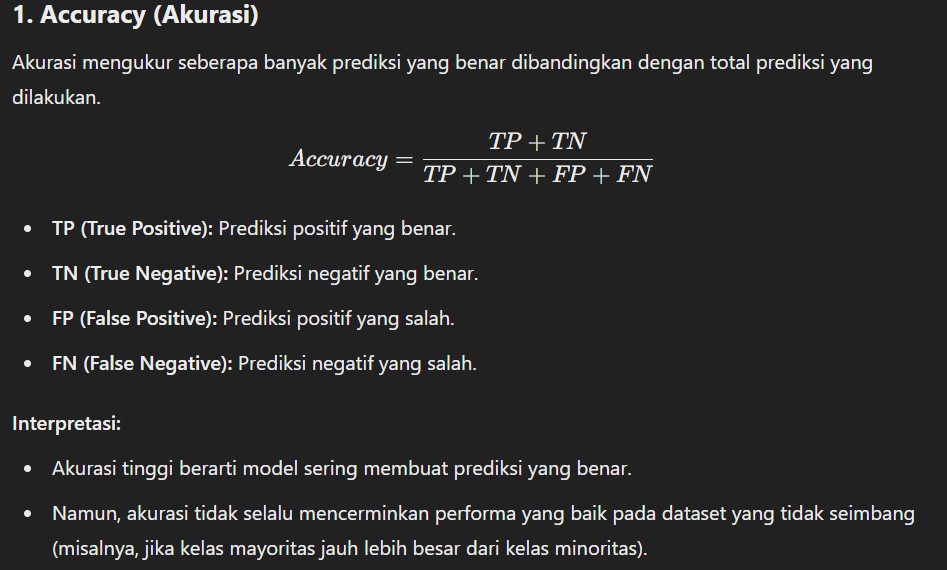

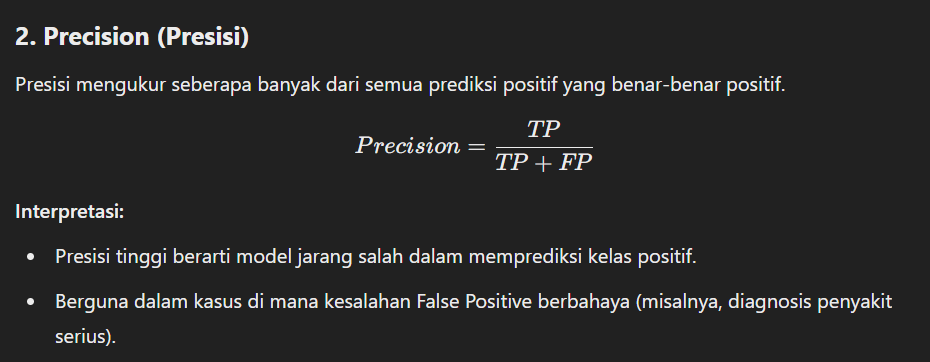

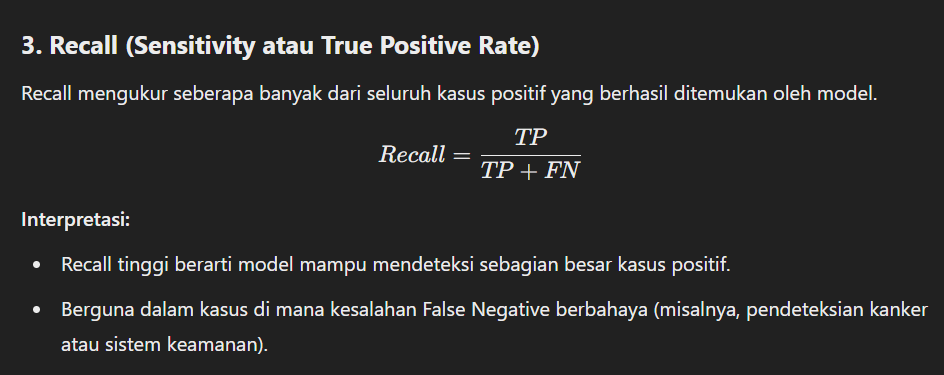

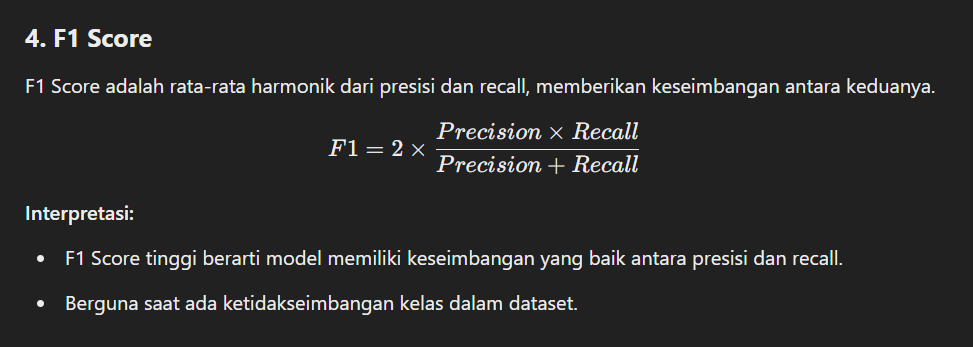

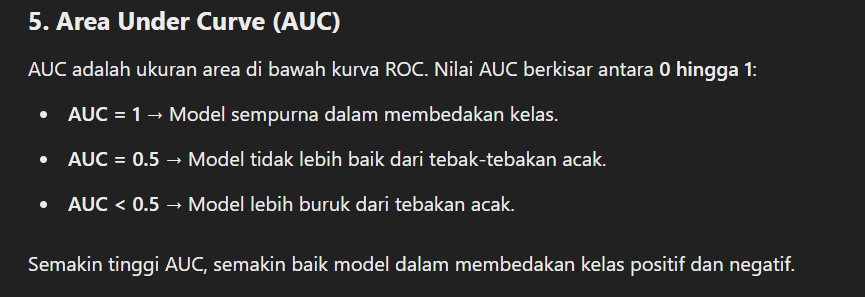

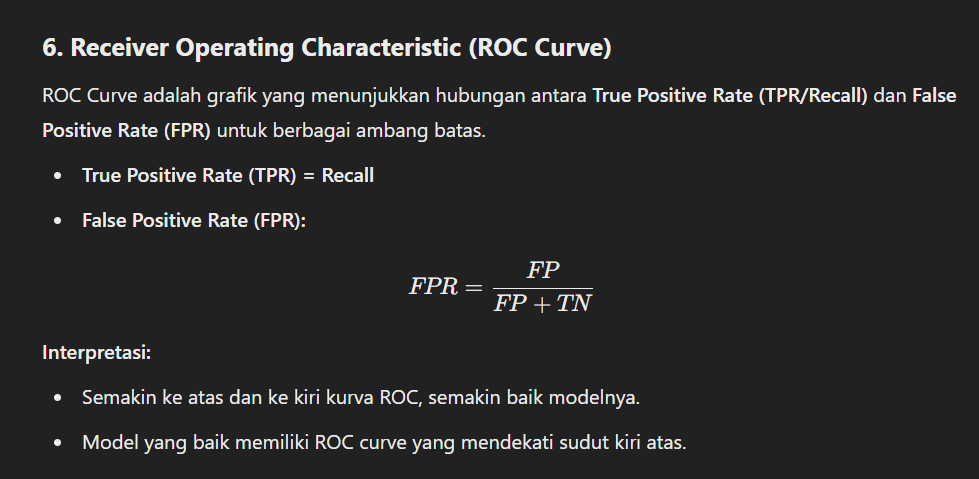

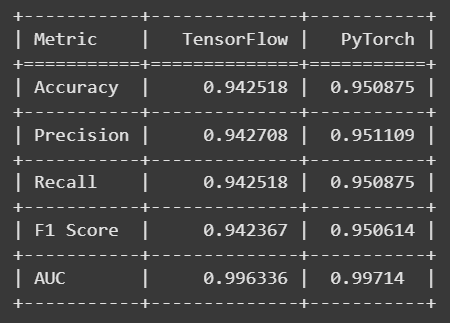

Pada tabel diatas dapat kita lihat bahwa PyTorch memiliki metriks yang lebih banyak dibandingkan TensorFlow